In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [2]:
sample_size = 495*2
width = 160
height = 160

In [44]:
files = ['Ikan', 'Udang']
adress = 'D:\\TITO\\Documents\\BANGKIT\\capstone\\FISH-SHRIMP-CLASSIFICATION\\data\\{}'
# adress = 'G:/Project Program/Python/AnimevsHuman/datasets/{}'
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)
        if i.endswith('.png'):
            data[col].append(i)

In [45]:
print(len(data['Ikan']))
print(len(data['Udang']))

495
495


In [46]:
pd.DataFrame(data).head()

,Ikan,Udang
0,d12b5e4c-0132-471c-87ce-7566a1aa0b47_png.rf.99...,26_jpg.rf.0c105cb9a07b3f900f67736416aa92b5.jpg
1,d12b5e4c-0132-471c-87ce-7566a1aa0b47_png.rf.ca...,26_jpg.rf.1b0d0eb288739f2976c3a688bf3914bf.jpg
2,d12b5e4c-0132-471c-87ce-7566a1aa0b47_png.rf.cf...,26_jpg.rf.1fde22f8728e82df0b2788486476c3bc.jpg
3,d12b5e4c-0132-471c-87ce-7tqs566a1aa0b47_png.rf...,26_jpg.rf.2517f471bdb0cb41e7937a4c56bbddde.jpg
4,d12b5e4c-0132-471c-87ce-7tqs566a1aa0b47_png.rf...,26_jpg.rf.2ae43e0de3dedd2bfda22c6fb5dd2845.jpg


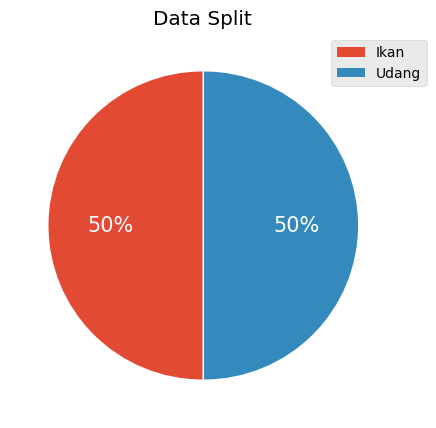

In [47]:
sizes = [len(data['Udang']), len(data['Ikan'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [48]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class Udang
Calculate Time 15.21524


In [49]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(990, 160, 160, 3)

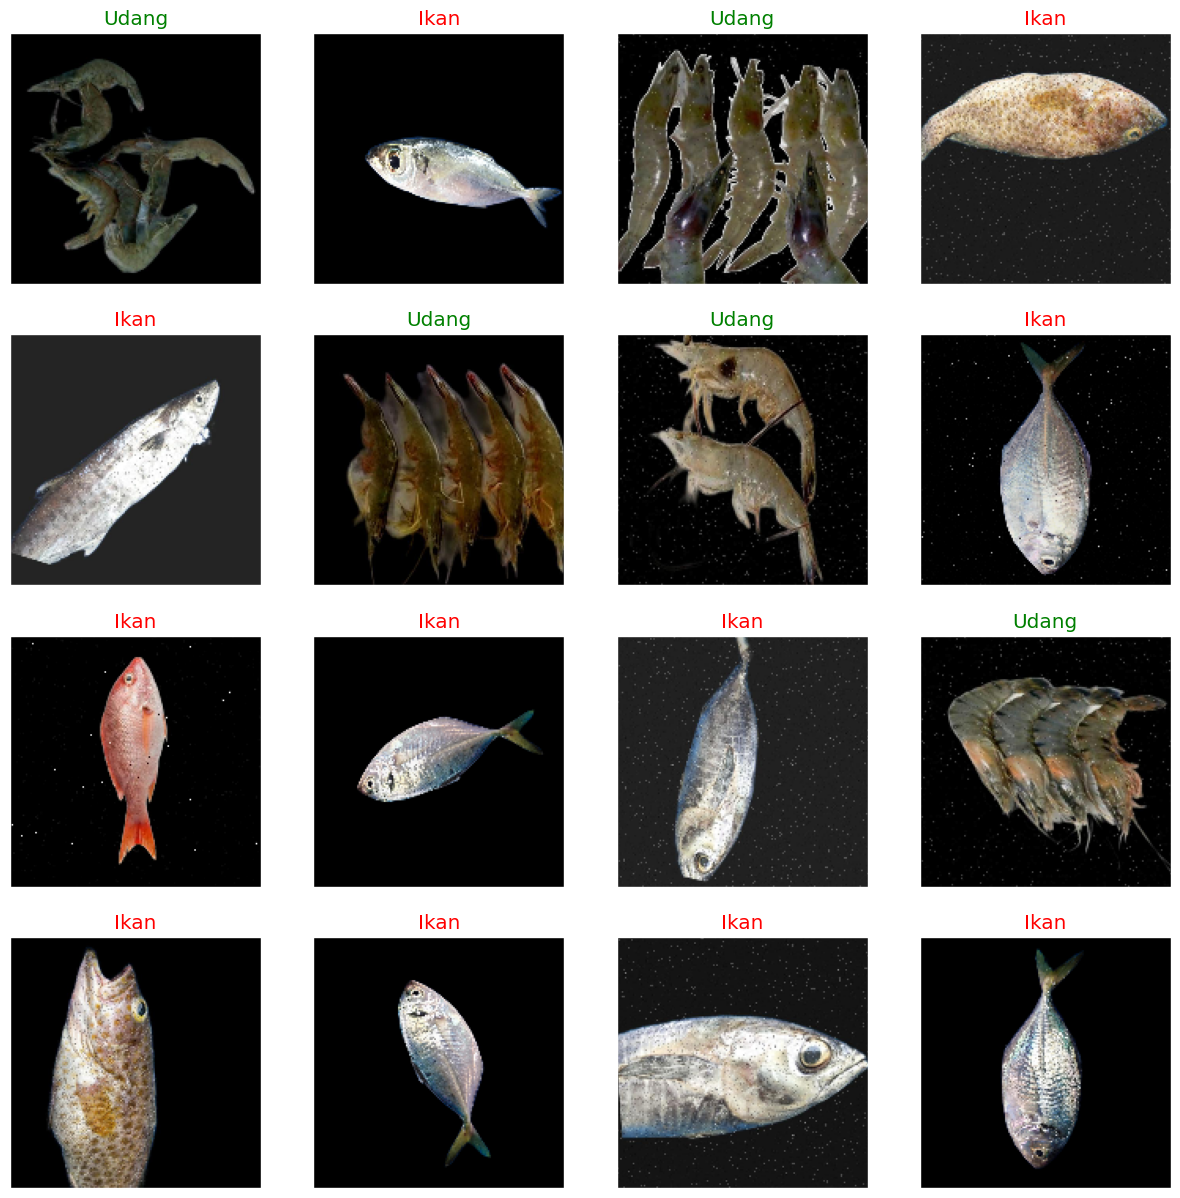

In [50]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Udang':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [51]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [52]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [70]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width, height, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(2, activation='sigmoid')
])

In [57]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=3,
                                                restore_best_weights=True)


In [72]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/20
22/22 [==============================] - 42s 2s/step - loss: 2.4112e-04 - accuracy: 1.0000 - val_loss: 1.3462e-06 - val_accuracy: 1.0000
Epoch 2/20
22/22 [==============================] - 38s 2s/step - loss: 5.1086e-05 - accuracy: 1.0000 - val_loss: 3.3996e-07 - val_accuracy: 1.0000
Epoch 3/20
22/22 [==============================] - 39s 2s/step - loss: 6.2185e-05 - accuracy: 1.0000 - val_loss: 3.4159e-06 - val_accuracy: 1.0000
Epoch 4/20
22/22 [==============================] - 38s 2s/step - loss: 6.5506e-05 - accuracy: 1.0000 - val_loss: 2.8899e-08 - val_accuracy: 1.0000


10/10 - 11s - loss: 1.3462e-06 - accuracy: 1.0000 - 11s/epoch - 1s/step


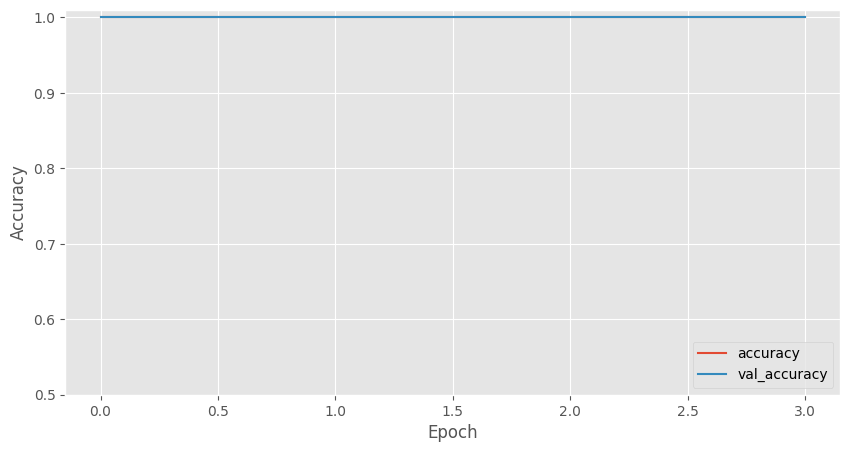

In [73]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [74]:
result=model.evaluate(test_images, test_labels)

10/10 [==============================] - 11s 1s/step - loss: 1.3462e-06 - accuracy: 1.0000


In [75]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 1.3461501566780498e-06
accuracy : 1.0


In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 64)                81984     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,340,033
Trainable params: 82,049
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

10/10 [==============================] - 12s 1s/step


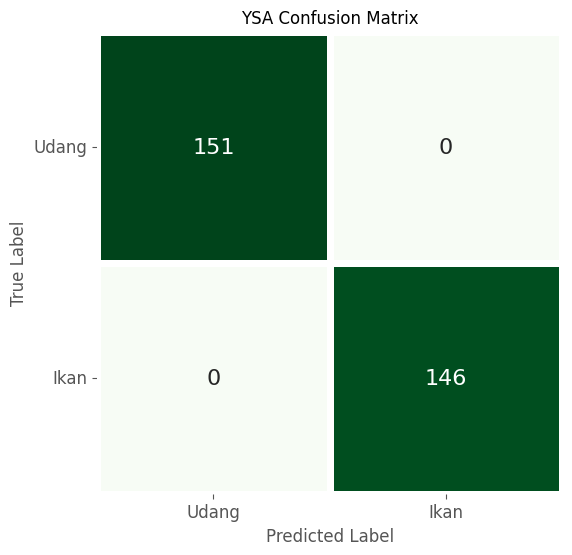

In [76]:
y_pred = model.predict(test_images)

def toClass(pred):

    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index

    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Udang","Ikan"], index= ["Udang","Ikan"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [77]:
import sklearn.metrics as metrics

precision = metrics.precision_score(test_labels, toClass(y_pred), average='macro')
print('Precision: %f' % precision)

Precision: 1.000000


In [65]:
def Prediction(image):

    global width, height, files, labels

    img = cv2.resize(image,(width,height))

    test = img / 255.0

    pred = model.predict(np.array([image])).argmax()

    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 36ms/step


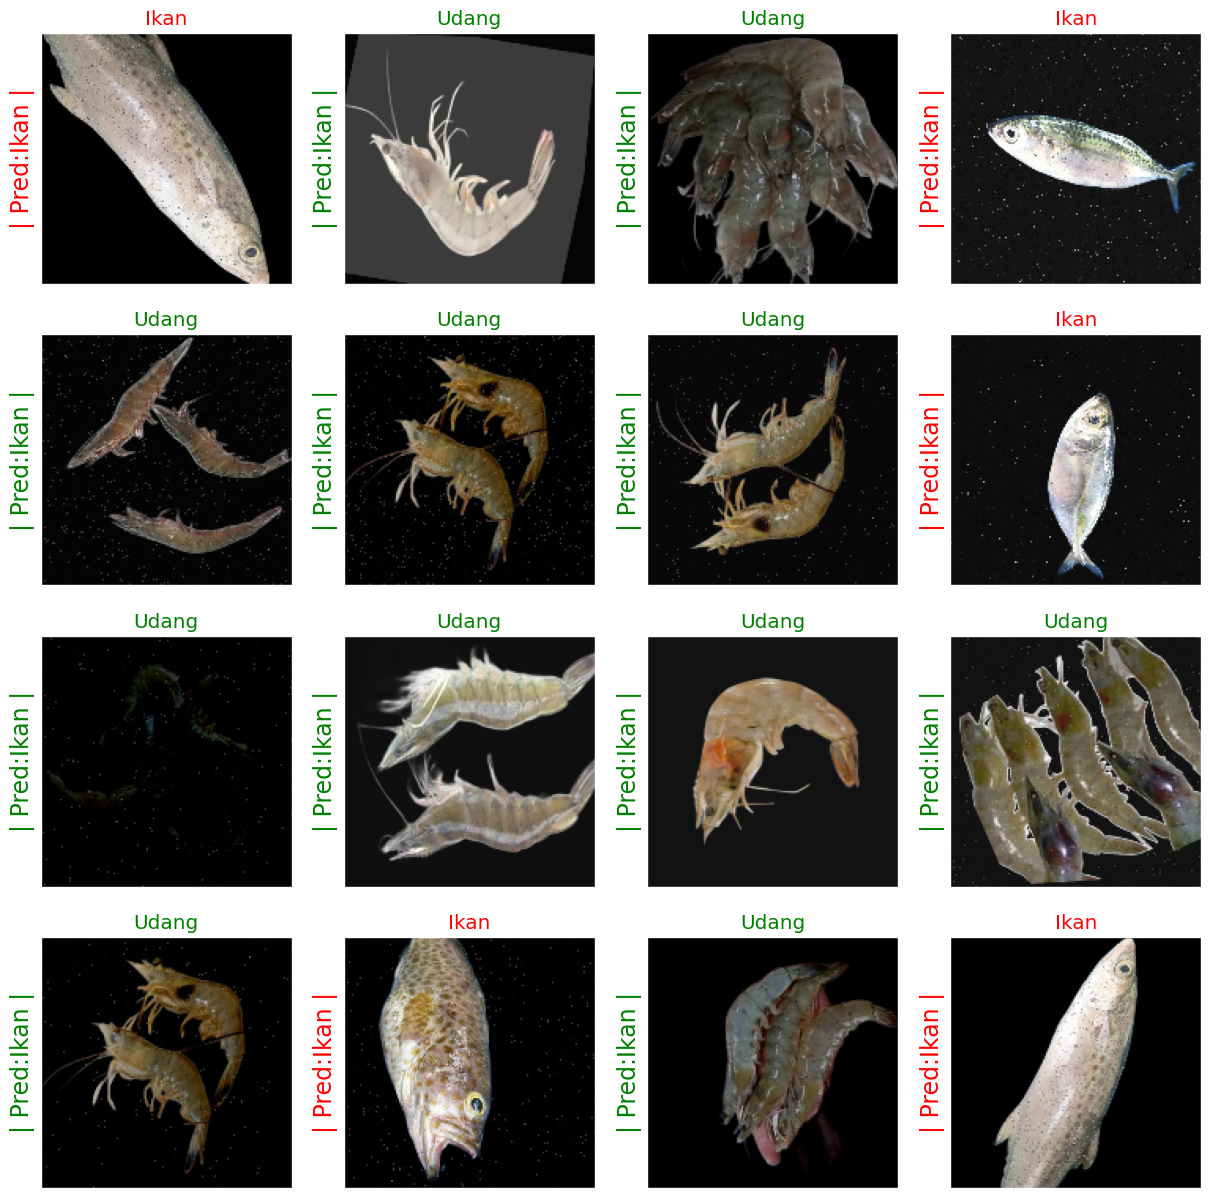

In [66]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Udang':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [116]:
from tensorflow.keras.models import load_model


1/1 [==============================] - 0s 49ms/step
Rentang hasil prediksi:
Nilai Minimum: 0.00015817312
Nilai Maksimum: 0.9987955
This Image belongs to class Udang


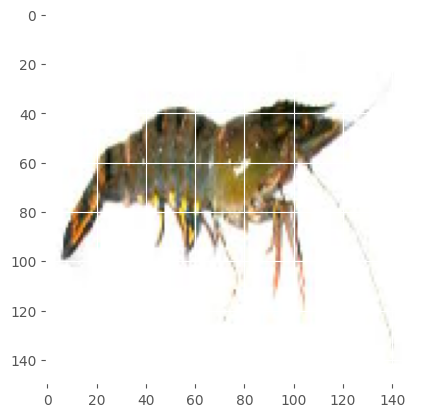

In [82]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras import utils
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk


#function to call the upload file dialog box
def upload_file():
    global img, predict_path
    f_types = [('Jpg Files', '*.jpg'), ('Png Files', '*.png'), ('All Files', '*.*')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    predict_path = filename
    img = ImageTk.PhotoImage(file=filename)
    my_w.destroy()

my_w = tk.Tk()
my_w.geometry("400x300")
my_w.title('upload your mri image')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='upload your mri image',width=30,font=my_font1)
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

my_w.mainloop()

img = image.load_img(predict_path, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar seperti saat melatih model

#Melakukan prediksi
classes = model.predict(x, batch_size=1)
nilai_min = np.min(classes)
nilai_max = np.max(classes)

print("Rentang hasil prediksi:")
print("Nilai Minimum:", nilai_min)
print("Nilai Maksimum:", nilai_max)

class_list = ['Ikan', 'Udang']  # Ganti dengan daftar kelas yang sesuai

predicted_class = class_list[np.argmax(classes[0])]
print('This Image belongs to class', predicted_class)

In [83]:
file_location = 'marine_classification.h5'
model.save(file_location)